# Import dependencies

In [242]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

# Define the generator object

In [275]:
def add_noise(img):
    '''Add random noise to an image'''
    VARIABILITY = 15
    deviation = VARIABILITY*random.random()
    noise = np.random.normal(0, deviation, img.shape)  # random noise will follow a random distribution with 0 as mean and deviation as std 
    img += noise
    return img

In [276]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [280]:
datagen = ImageDataGenerator(
         zca_epsilon = 1e-6,
         zca_whitening = True,
         rotation_range = 90,
         #width_shift_range = 0.2,
         #height_shift_range = [-5, 5],
         brightness_range = [0.1, 1.5],
         #shear_range = 5,
         zoom_range = 0.1,
         fill_mode = 'nearest',
         cval = 125,
         horizontal_flip = True,
         vertical_flip = True,
         #rescale = 0.4,
         preprocessing_function = add_noise)
         #validation_split = 0.1   # fraction of images reserved for validation    

# Excercise with a single image

In [282]:
data_dir = 'data\\Augmentation_excercise\\test'

imname = os.listdir(data_dir)[0]
imname

In [283]:
img = cv2.imread(os.path.join(data_dir, imname))
print(img.shape)
print(type(img))

(256, 256, 3)
<class 'numpy.ndarray'>


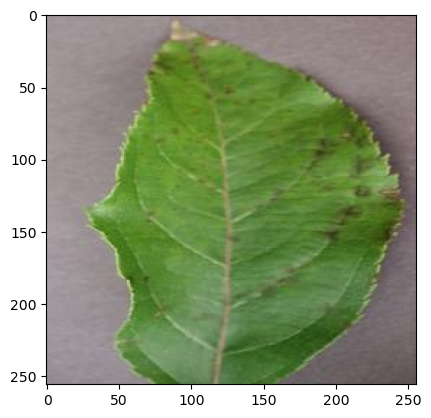

In [284]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [285]:
x = np.expand_dims(img, 0)

In [286]:
len(x)

1

In [287]:
x.shape

(1, 256, 256, 3)

In [288]:
i = 1
for batch in datagen.flow(x, batch_size = 16,
                         save_to_dir = data_dir,
                         save_prefix = 'aug',
                         save_format = 'jpg'):
    i += 1
    if i > 10:
        break

# Excercise with directories

In [155]:
data_dir2 = 'data\\Augmentation_excercise\\directories'

In [156]:
os.listdir(data_dir2)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust']

In [138]:
i = 5
for batch in datagen.flow_from_directory(directory = os.path.join(data_dir2), 
                                         batch_size = 16,
                                         target_size = (256, 256),
                                         color_mode = 'rgb',
                                         classes = None,
                                         class_mode = 'categorical',
                                         shuffle = True,
                                         save_to_dir = data_dir2,
                                         save_prefix = 'aug',
                                         save_format = 'jpg'):
    i += 1
    if i > 10:
        break

Found 15 images belonging to 3 classes.


In [139]:
type(batch)

tuple

In [140]:
len(batch)

2

In [141]:
batch[0].shape

(15, 256, 256, 3)

In [142]:
batch[1]

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [143]:
i = 5
for batch in datagen.flow_from_directory(directory = os.path.join(data_dir2), 
                                         batch_size = 16,
                                         target_size = (256, 256),
                                         color_mode = 'rgb',
                                         classes = None,
                                         class_mode = 'binary',
                                         shuffle = True,
                                         save_to_dir = data_dir2,
                                         save_prefix = 'aug',
                                         save_format = 'jpg'):
    i += 1
    if i > 10:
        break

Found 15 images belonging to 3 classes.


In [144]:
type(batch)

tuple

In [145]:
len(batch)

2

In [146]:
batch[0].shape

(15, 256, 256, 3)

In [147]:
batch[1]

array([2., 1., 1., 1., 2., 2., 0., 0., 0., 2., 0., 0., 1., 1., 2.],
      dtype=float32)

In [153]:
i = 5
for batch in datagen.flow_from_directory(directory = os.path.join(data_dir2), 
                                         batch_size = 16,
                                         target_size = (256, 256),
                                         color_mode = 'rgb',
                                         classes = None,
                                         class_mode = 'sparse',
                                         shuffle = True,
                                         save_to_dir = data_dir2,
                                         save_prefix = 'aug',
                                         save_format = 'jpg'):
    i += 1
    if i > 10:
        break

Found 15 images belonging to 3 classes.


In [149]:
type(batch)

tuple

In [150]:
len(batch)

2

In [151]:
batch[0].shape

(15, 256, 256, 3)

In [152]:
batch[1]

array([2., 0., 2., 0., 1., 2., 1., 0., 0., 0., 2., 1., 1., 2., 1.],
      dtype=float32)

# Excercise to save aug images to each class subfolder
**Perform augmentation for each class subdirectory until reach a certain number of images**

In [289]:
data_dir2 = 'data\\Augmentation_excercise\\directories'
os.listdir(data_dir2)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust']

In [290]:
for img_class in os.listdir(data_dir2):
    init = len(os.listdir(os.path.join(data_dir2, img_class)))
    if init >= 5:
        continue
    imgdata = []
    for img_name in os.listdir(os.path.join(data_dir2, img_class)):
        if (img_name.split('.')[1] == 'JPG'):
            img = cv2.imread(os.path.join(data_dir2, img_class, img_name))
            imgdata.append(img)
    x = np.array(imgdata)
    for batch in datagen.flow(x, batch_size = 16,
                         save_to_dir = os.path.join(data_dir2, img_class),
                         save_prefix = 'aug',
                         save_format = 'jpg'):
        i = len(os.listdir(os.path.join(data_dir2, img_class)))
        if i >= 5:
            break

In [291]:
for img_class in os.listdir(data_dir2):
    imgnum = len(os.listdir(os.path.join(data_dir2, img_class)))
    print(f'Total number of images after augmentation is {imgnum} under {os.path.join(data_dir2, img_class)}')

Total number of images after augmentation is 6 under data\Augmentation_excercise\directories\Apple___Apple_scab
Total number of images after augmentation is 5 under data\Augmentation_excercise\directories\Apple___Black_rot
Total number of images after augmentation is 5 under data\Augmentation_excercise\directories\Apple___Cedar_apple_rust


**Note:** There were 6 images ending up in `Apple__Apple_scab` because each `datagen.flow` generated 2 images since there was 2 original images.